In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr


In [25]:
results = pd.read_csv(r'C:\Users\leermdv\OneDrive - TNO\Documents\Python Scripts\ExtractionCalibrator\RMSE_all.csv', names = ['sim', 'RMSE', 'xcorlen', 'zcorlen','frac', 'cc'])
best = xr.open_dataset(r'C:\Users\leermdv\OneDrive - TNO\Documents\Python Scripts\ExtractionCalibrator\BestRealizations.nc')
Residuals = pd.read_csv(r"C:\Users\leermdv\OneDrive - TNO\Documents\Python Scripts\ExtractionCalibrator\Residuals_kort_fullrun.csv", index_col = "Time")
results.RMSE.min()
results


,,,,,sim,RMSE,xcorlen,zcorlen,frac,cc
0,0,1.032827,-1.033062,0.961375,-0.602500,0.755875,100,4,0.00,0.0
1,0,1.033691,-1.032000,0.953438,-0.606812,0.755875,100,4,0.00,0.5
2,0,1.035801,-1.032437,0.940063,-0.618625,0.755500,100,4,0.00,1.0
3,0,0.350622,0.131438,0.785438,0.407313,0.807125,100,4,0.00,1.5
4,1,1.037945,-1.040437,0.962250,-0.605813,0.756062,100,4,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...
195,48,0.522952,-0.187562,0.811063,0.093188,0.778563,500,16,0.15,1.5
196,49,1.052652,-1.081500,0.987812,-0.685812,0.753938,500,16,0.15,0.0
197,49,1.051993,-1.077750,0.977750,-0.685063,0.753688,500,16,0.15,0.5
198,49,1.053438,-1.077063,0.961625,-0.689000,0.753750,500,16,0.15,1.0


In [11]:

sel = best.sel(icell2d = 0)
print(sel)
resultsBetter = sel.to_dataframe()
print(len(resultsBetter))


<xarray.Dataset>
Dimensions:  (index: 321)
Coordinates:
    icell2d  int64 0
  * index    (index) int64 3 7 11 19 23 27 35 39 ... 95 135 139 143 171 187 31
Data variables:
    sim      (index) int64 0 1 2 4 5 6 8 9 10 11 ... 15 21 23 33 34 35 42 46 7
    RMSE     (index) float64 0.13 0.1283 0.1285 0.1295 ... 0.1341 0.1442 0.1647
    KGE      (index) float64 ...
    alpha    (index) float64 ...
    beta     (index) float64 ...
    r        (index) float64 ...
    xcorlen  (index) int64 100 100 100 100 100 100 ... 500 500 500 500 500 500
    zcorlen  (index) int64 4 4 4 4 4 4 4 4 4 4 ... 12 12 12 12 12 12 12 12 12 16
    frac     (index) float64 0.1 0.1 0.1 0.1 0.1 ... 0.15 0.15 0.15 0.15 0.15
    cc       (index) float64 1.5 1.5 1.5 1.5 1.5 1.5 ... 1.5 1.5 1.5 1.5 1.5 1.5
    k        (index) float64 ...
321


,icell2d,sim,RMSE,KGE,alpha,beta,r,xcorlen,zcorlen,frac,cc,k
index,,,,,,,,,,,,
3,0,0,0.129959,0.381250,0.836375,0.836125,0.819438,100,4,0.1,1.5,7582.474345
7,0,1,0.128345,0.377500,0.839875,0.838875,0.819187,100,4,0.1,1.5,3227.840851
11,0,2,0.128484,0.382000,0.836562,0.840438,0.819312,100,4,0.1,1.5,12080.648366
19,0,4,0.129466,0.377375,0.838812,0.832125,0.819063,100,4,0.1,1.5,5772.213751
23,0,5,0.126783,0.381937,0.840000,0.844750,0.819312,100,4,0.1,1.5,16301.728987


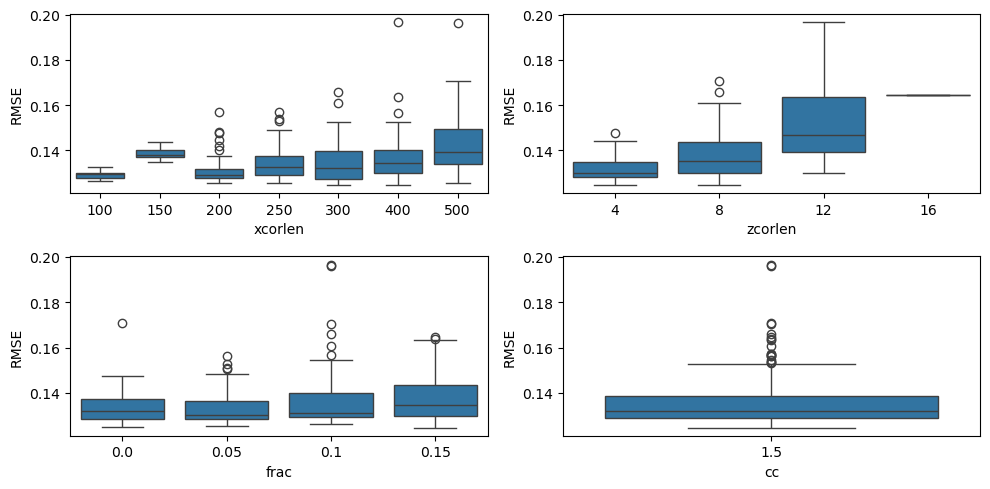

In [16]:
fig, axs = plt.subplots(2,2)
sns.boxplot(resultsBetter,x = 'xcorlen', y = 'RMSE', ax = axs[0,0])
sns.boxplot(resultsBetter,x = 'zcorlen', y = 'RMSE', ax = axs[0,1])
sns.boxplot(resultsBetter,x = 'frac', y = 'RMSE', ax = axs[1,0])
sns.boxplot(resultsBetter,x = 'cc', y = 'RMSE', ax = axs[1,1])
fig.set_size_inches(10,5)
fig.tight_layout()



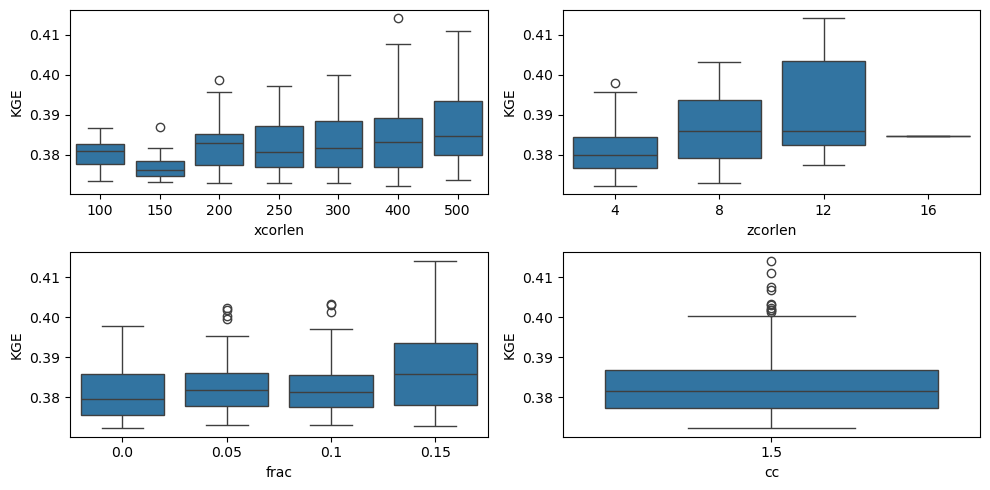

In [14]:
fig, axs = plt.subplots(2,2)
sns.boxplot(resultsBetter,x = 'xcorlen', y = 'KGE', ax = axs[0,0])
sns.boxplot(resultsBetter,x = 'zcorlen', y = 'KGE', ax = axs[0,1])
sns.boxplot(resultsBetter,x = 'frac', y = 'KGE', ax = axs[1,0])
sns.boxplot(resultsBetter,x = 'cc', y = 'KGE', ax = axs[1,1])
fig.set_size_inches(10,5)
fig.tight_layout()

(3.0, 17.0)

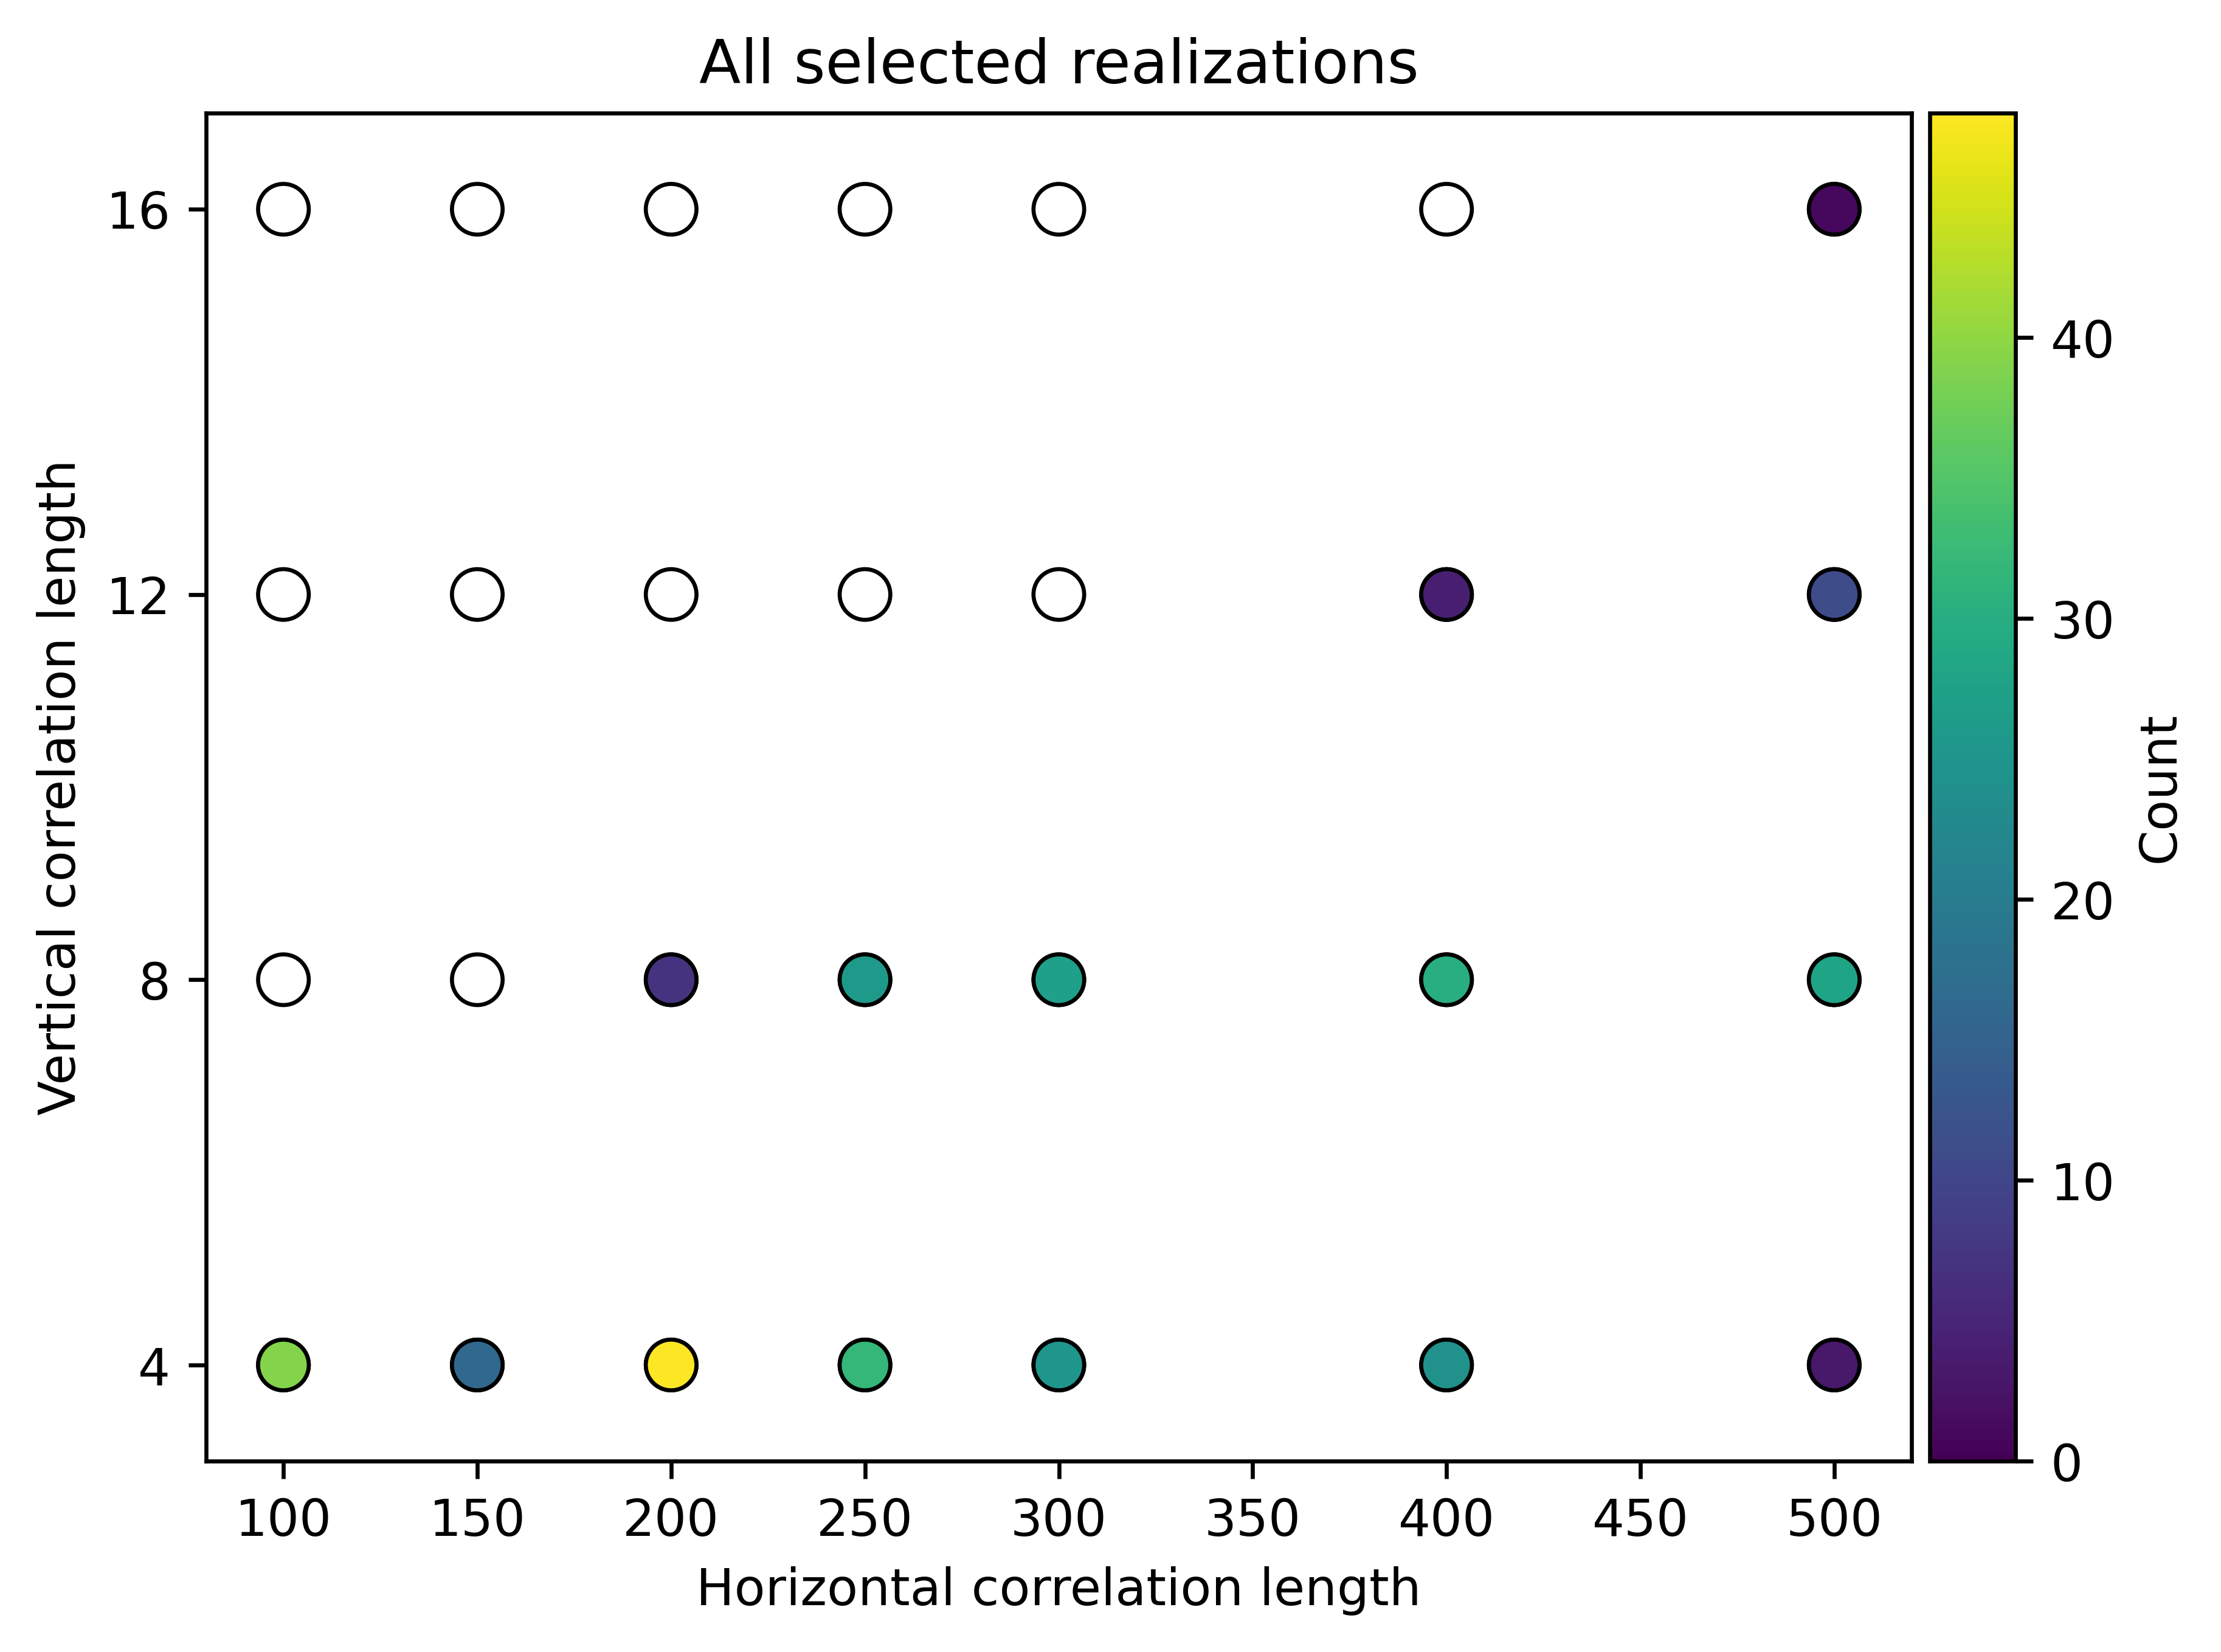

In [157]:
fig, axs = plt.subplots(dpi = 600)
no = 1
fulldf = results[['xcorlen', 'zcorlen']].value_counts().reset_index(name='count')
fulldf['count'] = 0

df = resultsBetter[['xcorlen', 'zcorlen']].value_counts().reset_index(name='count')

norm = plt.Normalize(0, df['count'].max())
sc = sns.scatterplot(fulldf,x = 'xcorlen', y = 'zcorlen', ax = axs, edgecolor = 'black', facecolors = 'none', s = 100)
sns.scatterplot(df,x = 'xcorlen', y = 'zcorlen', hue = 'count', ax = axs,hue_norm = norm, palette = 'viridis', s= 100, edgecolor = 'black')
sm = plt.cm.ScalarMappable(cmap="viridis", norm=norm)
sm.set_array([])
divider = make_axes_locatable(axs)
cax = divider.append_axes('right', size='5%', pad=0.05)
axs.get_legend().remove()
axs.figure.colorbar(sm, cax = cax, label = 'Count')


axs.set_title(f'All selected realizations')
axs.set_xlabel('Horizontal correlation length')
axs.set_ylabel('Vertical correlation length')
axs.set_yticks([4,8,12,16])
axs.set_ylim([3,17])

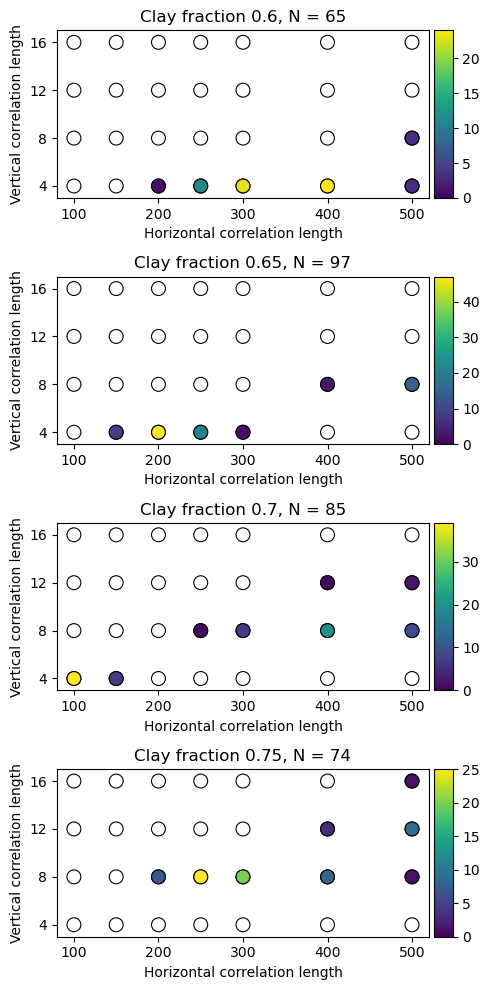

In [176]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
fig, axs = plt.subplots(4)
fig.set_size_inches(5,10)

for no,frac in enumerate((np.sort(resultsBetter.frac.unique()))):
    #get counts
    fulldf = results[['xcorlen', 'zcorlen']].value_counts().reset_index(name='count')
    fulldf['count'] = 0
    sel = resultsBetter[resultsBetter.frac == frac]
    df = sel[['xcorlen', 'zcorlen']].value_counts().reset_index(name='count')

    norm = plt.Normalize(0, df['count'].max())
    sc = sns.scatterplot(fulldf,x = 'xcorlen', y = 'zcorlen', ax = axs[no], edgecolor = 'black', facecolors = 'none', s = 100)
    sns.scatterplot(df,x = 'xcorlen', y = 'zcorlen', hue = 'count', ax = axs[no],hue_norm = norm, palette = 'viridis', s= 100, edgecolor = 'black')
    sm = plt.cm.ScalarMappable(cmap="viridis", norm=norm)
    sm.set_array([])
    divider = make_axes_locatable(axs[no])
    cax = divider.append_axes('right', size='5%', pad=0.05)
    axs[no].get_legend().remove()
    axs[no].figure.colorbar(sm, cax = cax)


    axs[no].set_title(f'Clay fraction {0.60 + frac}, N = {len(sel)}')
    axs[no].set_xlabel('Horizontal correlation length')
    axs[no].set_ylabel('Vertical correlation length')
    axs[no].set_yticks([4,8,12,16])
    axs[no].set_ylim([3,17])

fig.tight_layout()

<Axes: xlabel='frac', ylabel='Count'>

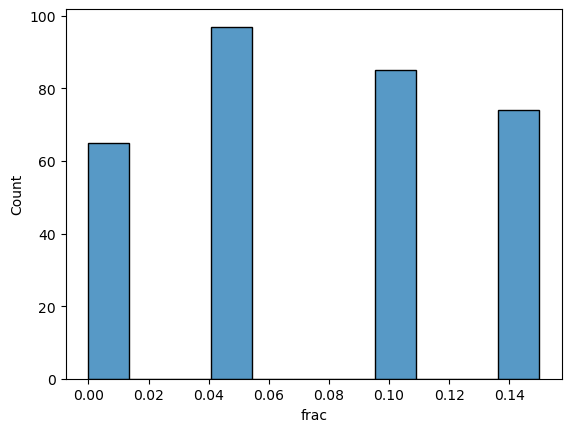

In [24]:
fig, ax = plt.subplots()
sns.histplot(data = resultsBetter, x = 'frac')

In [96]:
best

<xarray.Dataset>
Dimensions:  (icell2d: 844, index: 321)
Coordinates:
  * icell2d  (icell2d) int64 0 1 2 3 4 5 6 7 ... 836 837 838 839 840 841 842 843
  * index    (index) int64 3 7 11 19 23 27 35 39 ... 95 135 139 143 171 187 31
Data variables:
    sim      (icell2d, index) int64 ...
    RMSE     (icell2d, index) float64 ...
    KGE      (icell2d, index) float64 ...
    alpha    (icell2d, index) float64 ...
    beta     (icell2d, index) float64 ...
    r        (icell2d, index) float64 ...
    xcorlen  (icell2d, index) int64 ...
    zcorlen  (icell2d, index) int64 ...
    frac     (icell2d, index) float64 ...
    cc       (icell2d, index) float64 ...
    k        (index, icell2d) float64 ...

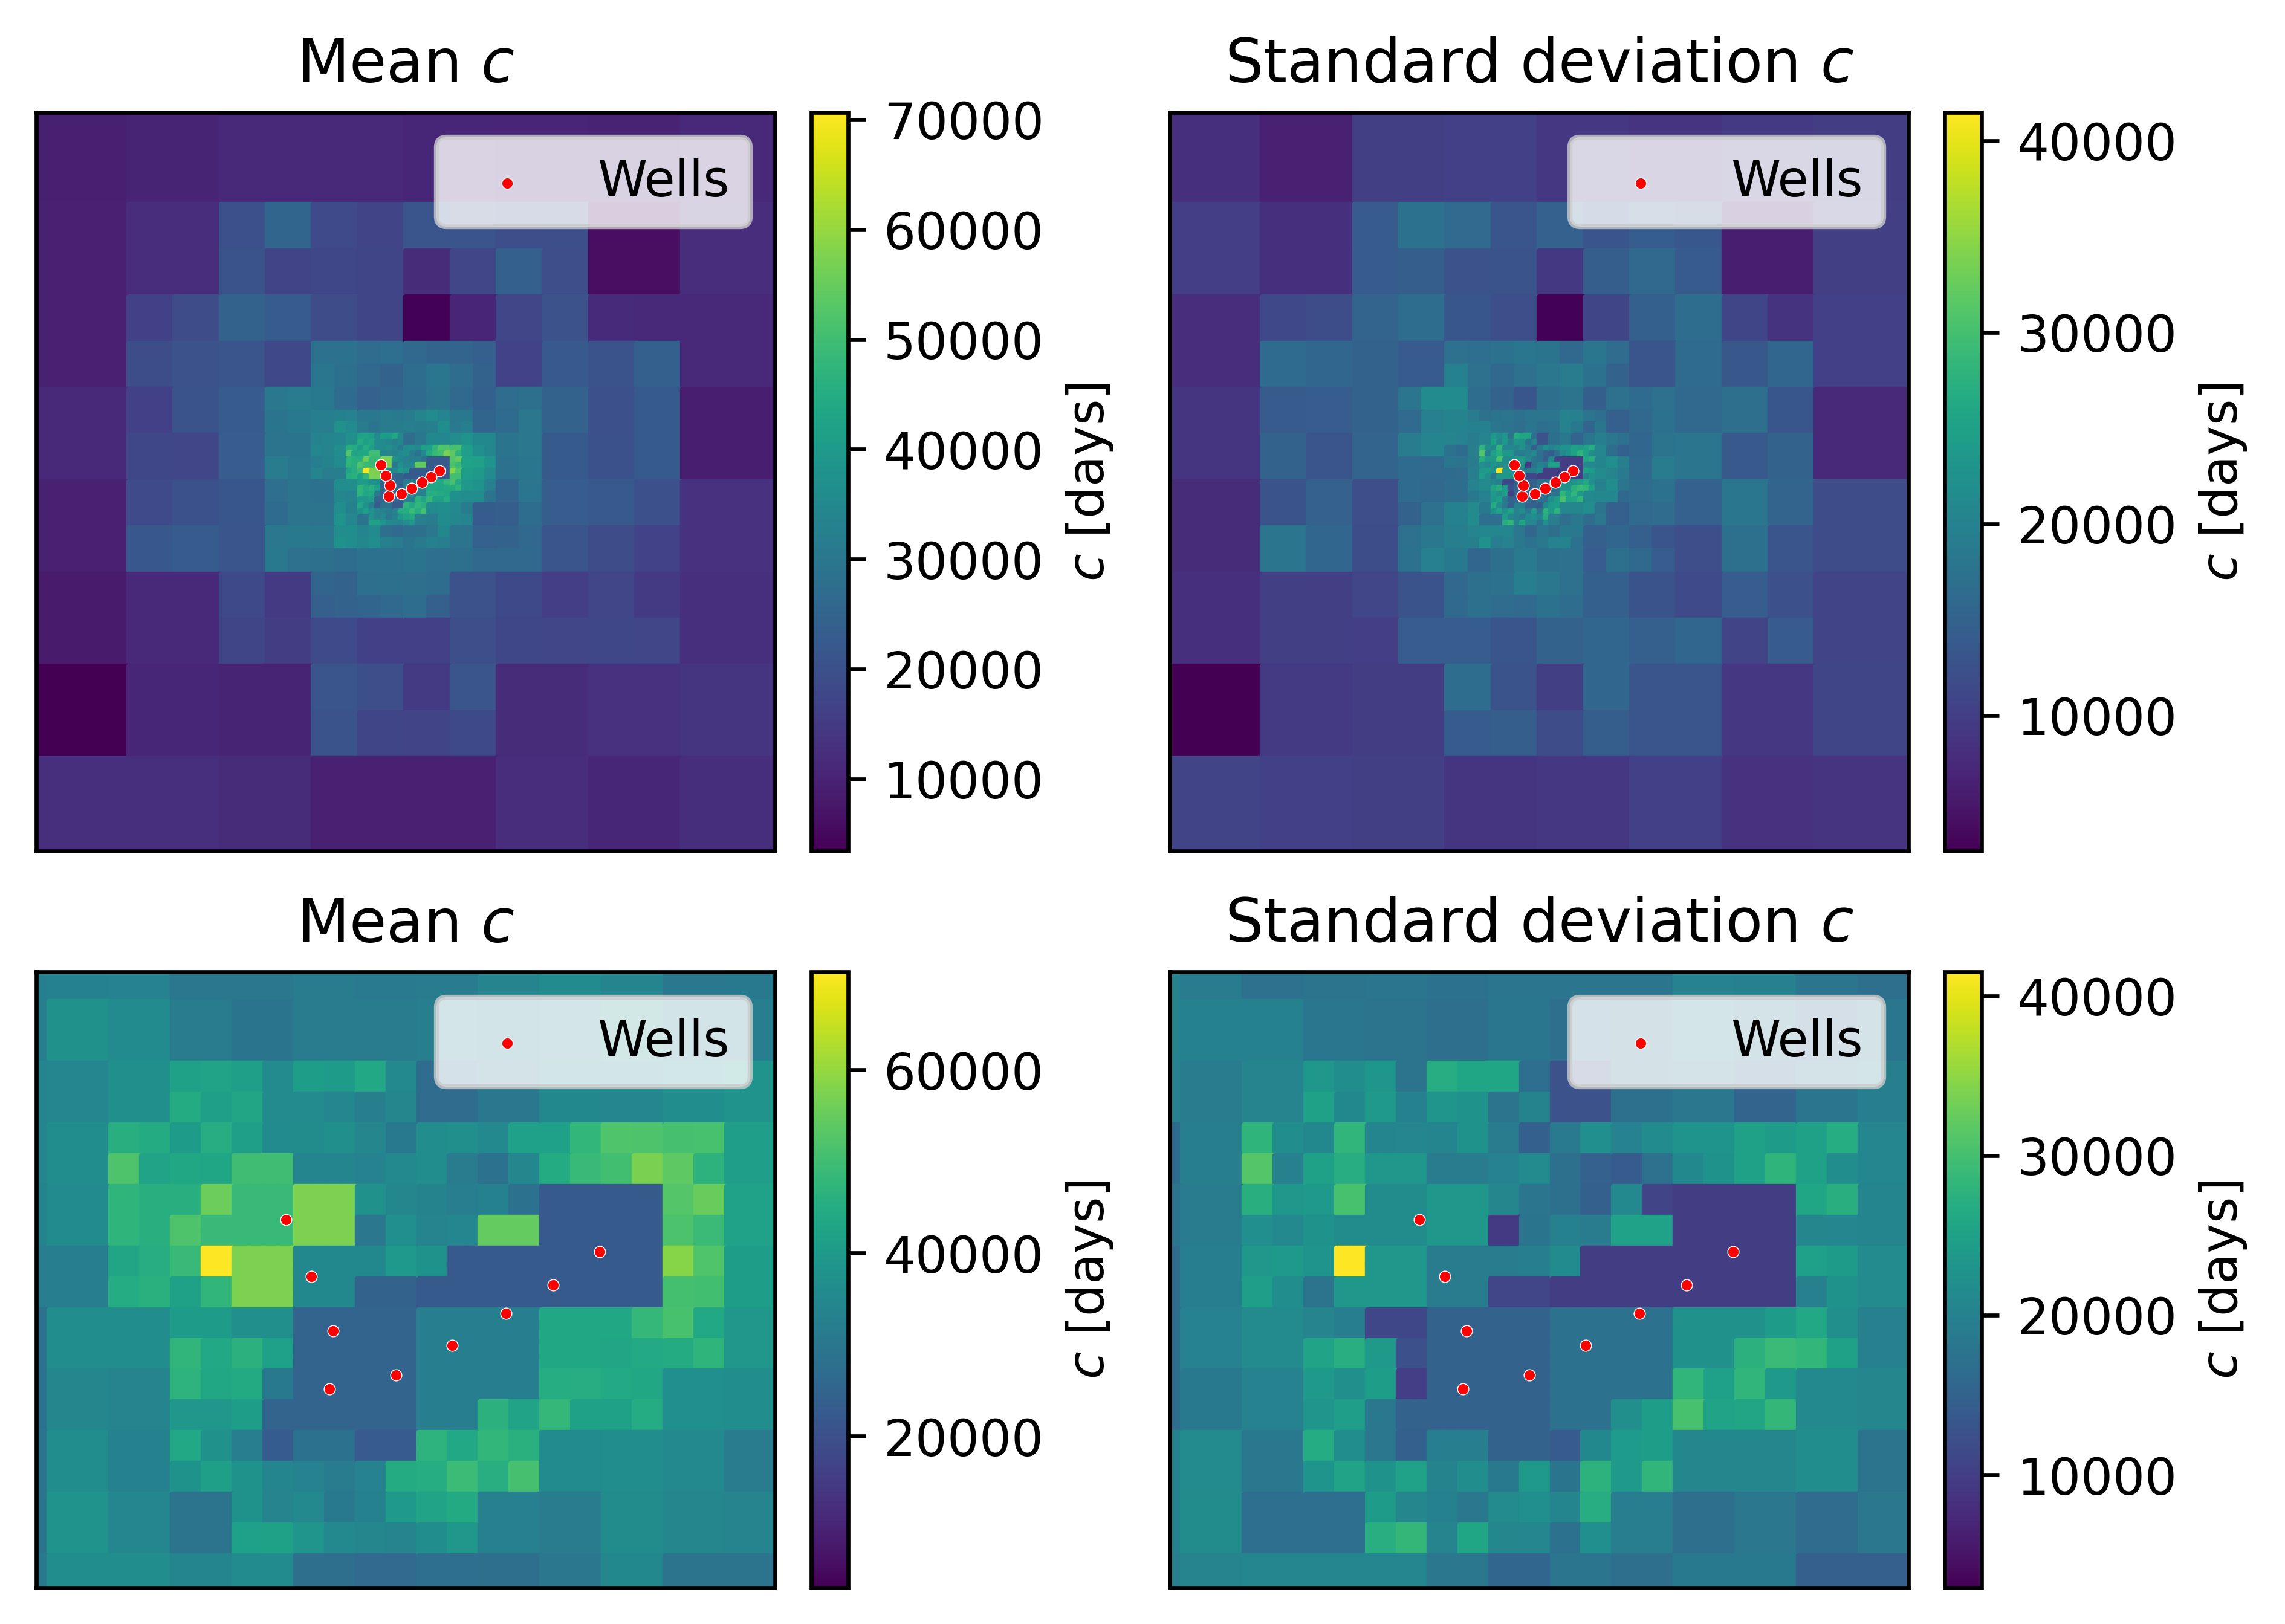

In [175]:
import nlmod
import xarray as xr
import os 

fig, axs = plt.subplots(2,2, dpi = 600)
ds = xr.open_dataset(r"C:\Users\leermdv\OneDrive - TNO\Documents\Python Scripts\ExtractionCalibrator\kort_fullrun_ss.nc")
ExWells = pd.read_csv(os.path.join('..','Data','dawaco',f'winputten_WG_Budel.csv'))
# nlmod.plot.modelgrid(ds, linewidth = 1, alpha = 0.5)
# nlmod.plot.data_array(ds.sel(layer = 'KIk2').kv, ds = ds)
ds['meanbestKV'] = best.k.mean(dim='index')
ds['stdbestKV'] = best.k.std(dim='index')

nlmod.plot.map_array(ds.meanbestKV, ds = ds, ax = axs[0,0], colorbar = True, colorbar_label = '$c$ [days]', title = 'Mean $c$', plot_grid = False)
nlmod.plot.map_array(ds.stdbestKV, ds = ds, ax = axs[0,1], colorbar = True, colorbar_label = '$c$ [days]',title = 'Standard deviation $c$', plot_grid = False)
nlmod.plot.map_array(ds.meanbestKV, ds = ds, ax = axs[1,0], colorbar = True, colorbar_label = '$c$ [days]', title = 'Mean $c$', plot_grid = False)
nlmod.plot.map_array(ds.stdbestKV, ds = ds, ax = axs[1,1], colorbar = True, colorbar_label = '$c$ [days]',title = 'Standard deviation $c$', plot_grid = False)

for x in [0,1]:
    for y in [0,1]:
        sns.scatterplot(ExWells,  x='x_coordinaat', y = 'y_coordinaat', ax = axs[x,y], c = 'red', s = 5, label = 'Wells')
        axs[x,y].set_xticks([])
        axs[x,y].set_yticks([])
        axs[x,y].set_ylabel('')
        axs[x,y].set_xlabel('')
        axs[x,y].set_aspect('equal')
    axs[1,x].set_xlim([168300, 169500])
    axs[1,x].set_ylim([366300, 367300])




fig.tight_layout()



In [191]:
2**2.16 * 2**0.2

5.133703590251617

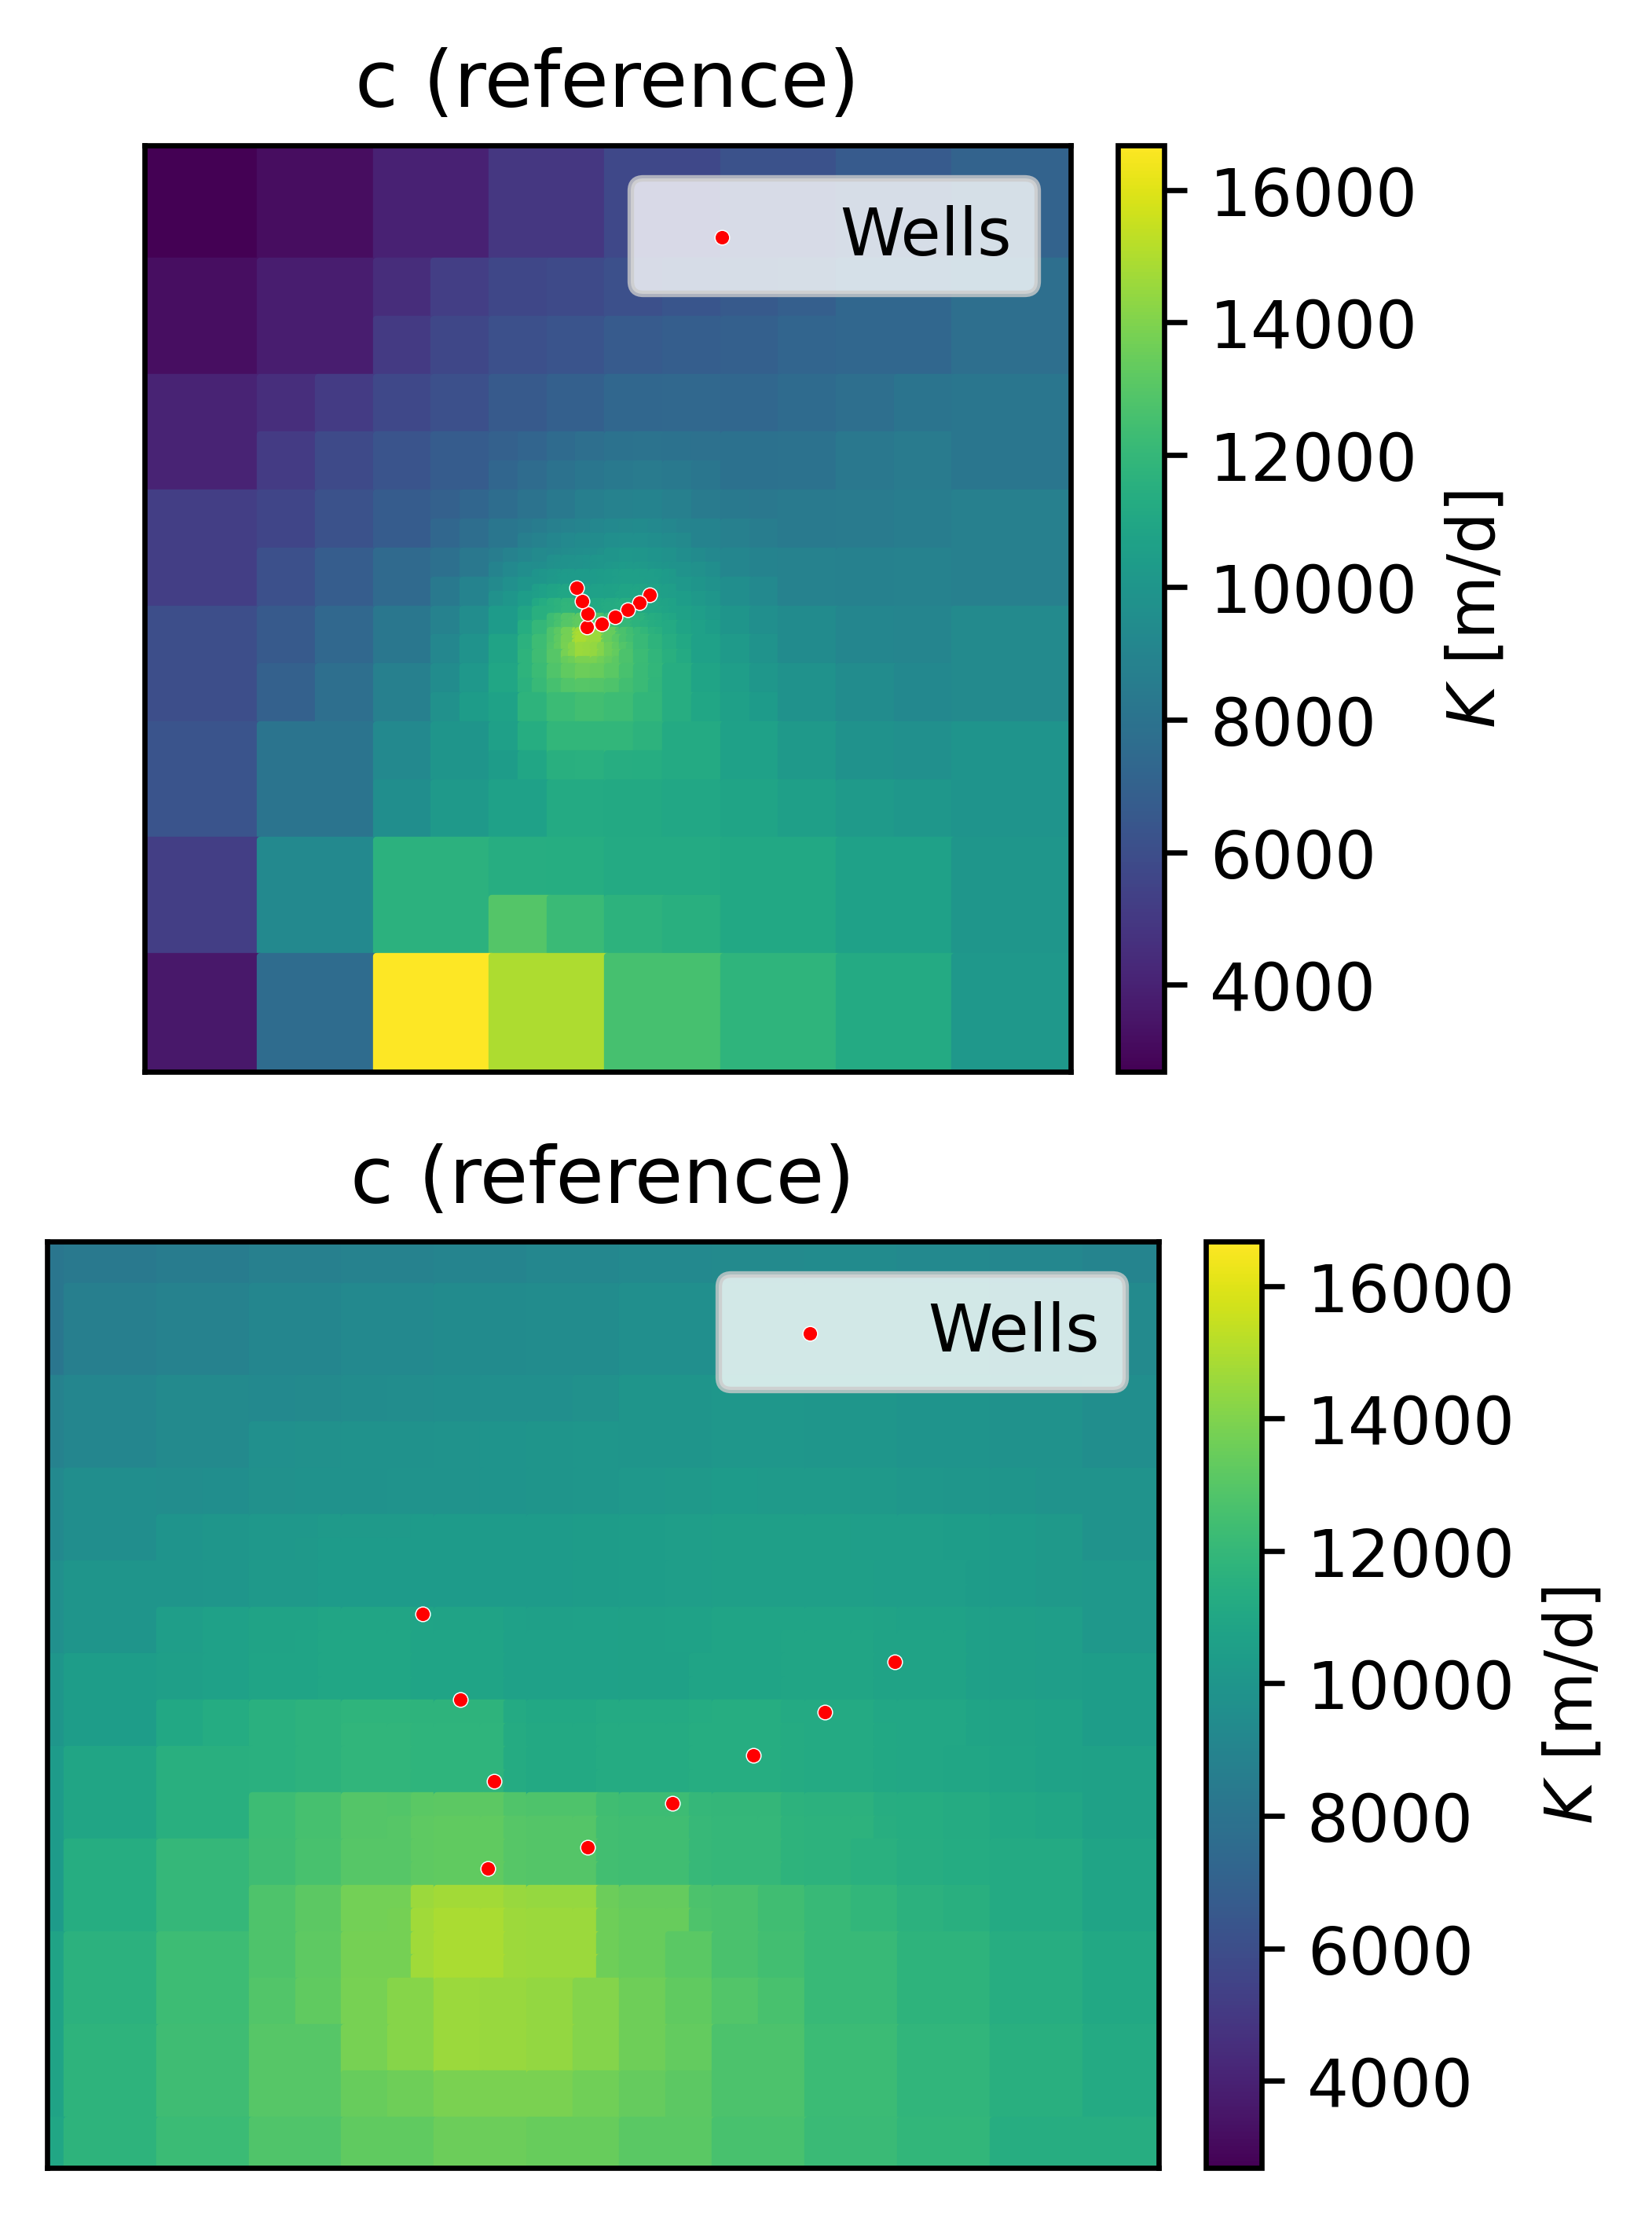

In [197]:
import nlmod
import xarray as xr
import os 

fig, axs = plt.subplots(2, dpi = 600)
ds = xr.open_dataset(r"C:\Users\leermdv\OneDrive - TNO\Documents\Python Scripts\ExtractionCalibrator\kort_fullrun_ss.nc")
ExWells = pd.read_csv(os.path.join('..','Data','dawaco',f'winputten_WG_Budel.csv'))
# nlmod.plot.modelgrid(ds, linewidth = 1, alpha = 0.5)
# nlmod.plot.data_array(ds.sel(layer = 'KIk2').kv, ds = ds)
ds['meanbestKV'] = best.k.mean(dim='index')
ds['stdbestKV'] = best.k.std(dim='index')
d =  -(ds.isel(layer = list(ds.layer).index('KIk2')).botm - ds.isel(layer = list(ds.layer).index('KIk2') -1).botm)
c = d/(ds.sel(layer = 'KIk2').kv*5.13)
nlmod.plot.map_array(c, ds = ds, ax = axs[0], colorbar = True, colorbar_label = '$c$ [days]', title = 'Kv', plot_grid = False)
nlmod.plot.map_array(c, ds = ds, ax = axs[1], colorbar = True, colorbar_label = '$c$ [days]', title = 'Kv', plot_grid = False)

for y in [0,1]:
    sns.scatterplot(ExWells,  x='x_coordinaat', y = 'y_coordinaat', ax = axs[y], c = 'red', s = 5, label = 'Wells')
    axs[y].set_xticks([])
    axs[y].set_yticks([])
    axs[y].set_ylabel('')
    axs[y].set_xlabel('')
    axs[y].set_aspect('equal')
    axs[y].get_title()
    axs[y].set_title("c (reference)")
axs[1].set_xlim([168300, 169500])
axs[1].set_ylim([366300, 367300])

2**2.16 * 2**0.2


fig.tight_layout()

0.0159795103298652

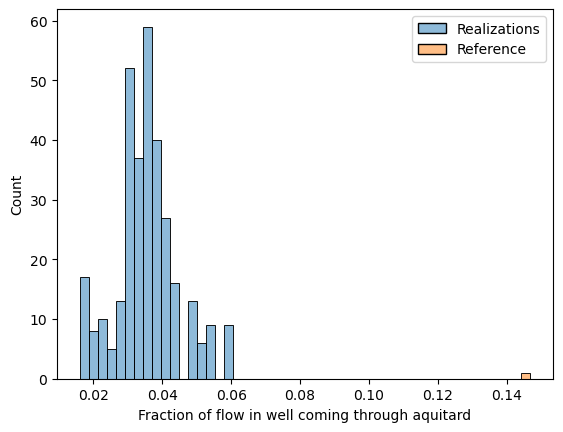

In [152]:
import seaborn as sns
flowfrac = pd.read_csv(r"C:\Users\leermdv\OneDrive - TNO\Documents\Python Scripts\ExtractionCalibrator\flowfrac.csv")
dist = pd.read_csv(r"C:\Users\leermdv\OneDrive - TNO\Documents\Python Scripts\ExtractionCalibrator\TT_dist.csv")
fig, ax = plt.subplots()
h = sns.histplot(data = flowfrac, x = 'Flowfrac', hue = 'Realization', ax= ax)
h.get_legend().set_title(None)
ax.set_xlabel('Fraction of flow in well coming through aquitard')

min(flowfrac.Flowfrac)

4.1878567

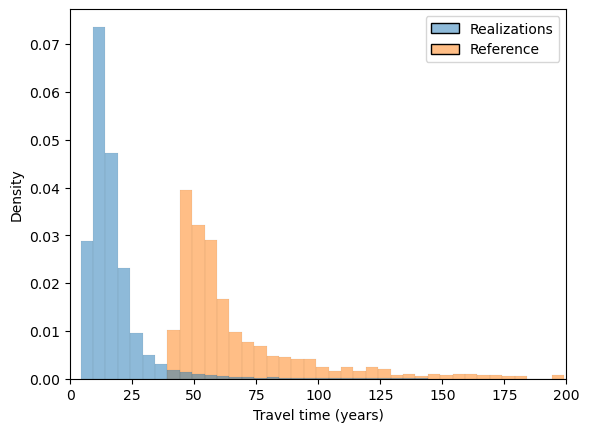

In [151]:
import seaborn as sns
import matplotlib.pyplot as plt 
dist = pd.read_csv(r"C:\Users\leermdv\OneDrive - TNO\Documents\Python Scripts\ExtractionCalibrator\TT_dist.csv")
fig, ax = plt.subplots()
h = sns.histplot(data = dist, x = 'dist', hue = 'Realization', stat="density", common_norm=False, ax = ax, binwidth =5)
ax.set_xlim((0,200))
ax.set_xlabel('Travel time (years)')
h.get_legend().set_title(None)
min(dist.dist)
